In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv(r'D:\Datasets\glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data['Type'] = np.where(data['Type']<3,0,1)
data['Type'].value_counts(normalize=True)

0    0.682243
1    0.317757
Name: Type, dtype: float64

In [4]:
x = data.drop('Type',axis=1)
y = data['Type']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [7]:
y_pred = dtc.predict(x_test)

In [8]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.6666666666666666
[[25 14]
 [ 4 11]]
              precision    recall  f1-score   support

           0       0.86      0.64      0.74        39
           1       0.44      0.73      0.55        15

    accuracy                           0.67        54
   macro avg       0.65      0.69      0.64        54
weighted avg       0.74      0.67      0.68        54



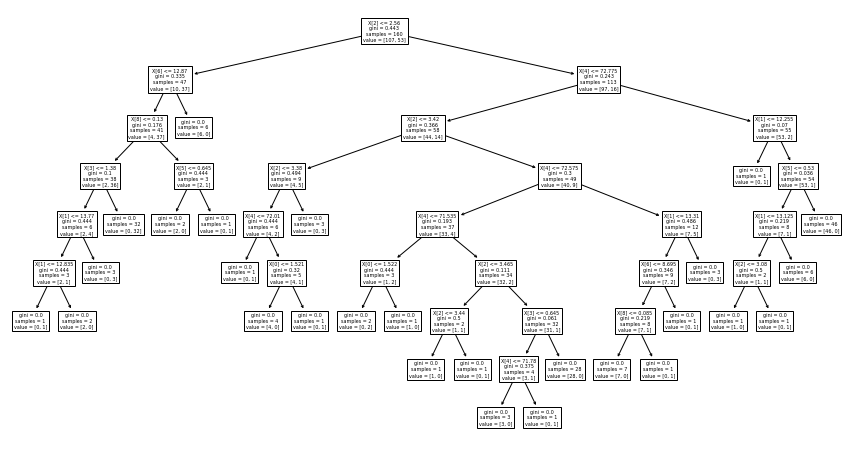

In [9]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(dtc)
plt.show()

### Hyperparameter Tuning and studying the important/decisive parameters


In [10]:
dtc1 = DecisionTreeClassifier(min_samples_split = 35)
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=35)

In [11]:
y_predd = dtc1.predict(x_test)


In [12]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predd))
print(metrics.confusion_matrix(y_test,y_predd))
print(metrics.classification_report(y_test,y_predd))

0.8333333333333334
[[33  6]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.67      0.80      0.73        15

    accuracy                           0.83        54
   macro avg       0.79      0.82      0.80        54
weighted avg       0.85      0.83      0.84        54



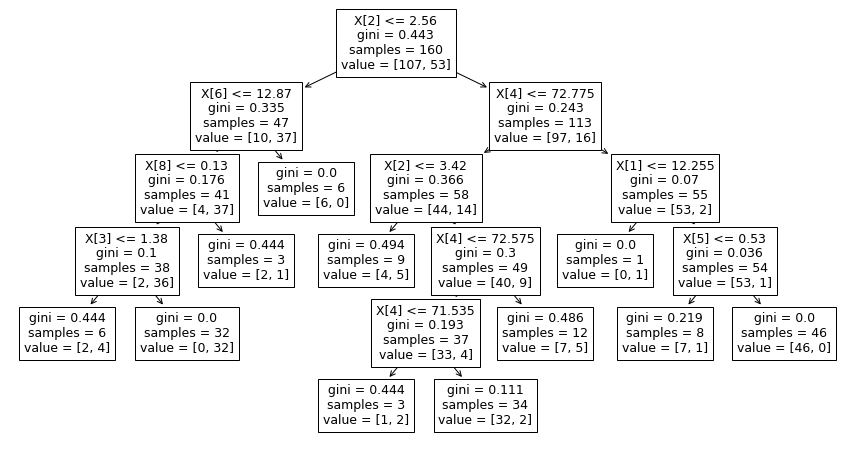

In [13]:
plt.figure(figsize = (15,8))
from sklearn import tree
tree.plot_tree(dtc1)
plt.show()

In [14]:
#min_sample_split :- The minimum number of samples required to split the node eg :- if set min_sample_split=35
#then if there are 35 or more samples in node then only it will split else will not split and become leaf node

In [15]:
dtc2 = DecisionTreeClassifier(min_samples_leaf = 50)
dtc2.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [16]:
y_pr = dtc2.predict(x_test)

In [17]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pr))
print(metrics.confusion_matrix(y_test,y_pr))
print(metrics.classification_report(y_test,y_pr))

0.8703703703703703
[[36  3]
 [ 4 11]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.79      0.73      0.76        15

    accuracy                           0.87        54
   macro avg       0.84      0.83      0.84        54
weighted avg       0.87      0.87      0.87        54



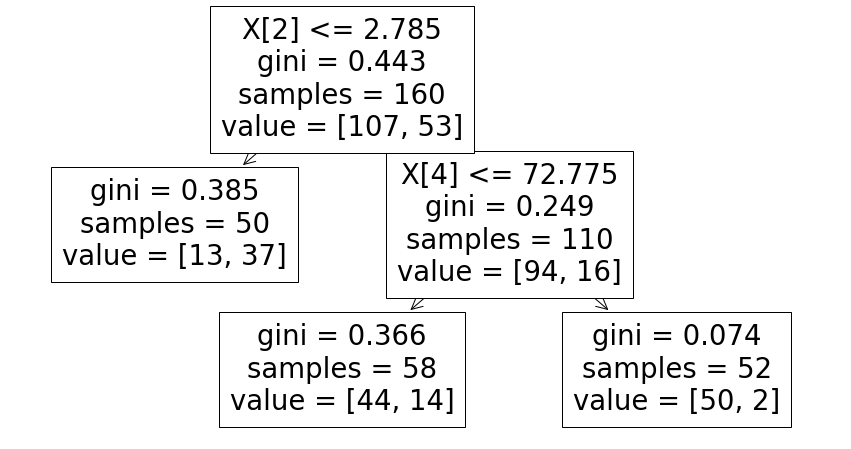

In [18]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(dtc2)
plt.show()

In [18]:
dtc3 = DecisionTreeClassifier(max_leaf_nodes = 10)
dtc3.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [19]:
y_pre = dtc.predict(x_test)

In [20]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pre))
print(metrics.confusion_matrix(y_test,y_pre))
print(metrics.classification_report(y_test,y_pre))

0.8888888888888888
[[35  1]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        36
           1       0.93      0.72      0.81        18

    accuracy                           0.89        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.89      0.89      0.88        54



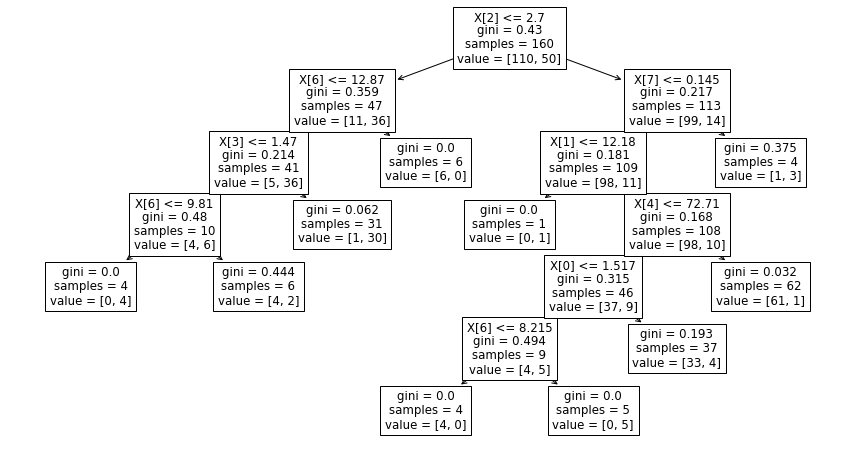

In [21]:
plt.figure(figsize = (15,8))
from sklearn import tree
tree.plot_tree(dtc3)
plt.show()

In [23]:
# see min_impurity_decrease

In [22]:
dtc4 = DecisionTreeClassifier(splitter = 'random')
dtc4.fit(x_train,y_train)

DecisionTreeClassifier(splitter='random')

In [23]:
y_p = dtc.predict(x_test)

In [24]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_p))
print(metrics.confusion_matrix(y_test,y_p))
print(metrics.classification_report(y_test,y_p))

0.8888888888888888
[[35  1]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        36
           1       0.93      0.72      0.81        18

    accuracy                           0.89        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.89      0.89      0.88        54



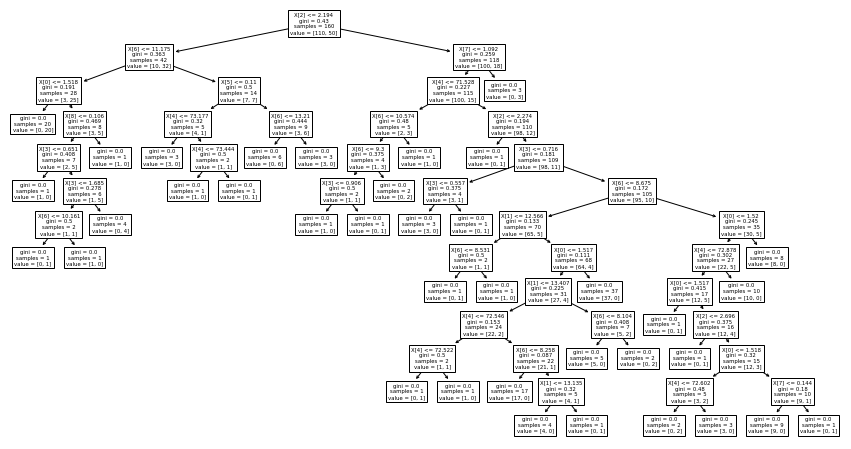

In [25]:
plt.figure(figsize = (15,8))
from sklearn import tree
tree.plot_tree(dtc4)
plt.show()

In [28]:
dtc5 = DecisionTreeClassifier(min_impurity_decrease = 0.0074)
dtc5.fit(x_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0074)

In [29]:
y_predi = dtc5.predict(x_test)


In [30]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predi))
print(metrics.confusion_matrix(y_test,y_predi))
print(metrics.classification_report(y_test,y_predi))

0.8148148148148148
[[33  4]
 [ 6 11]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.73      0.65      0.69        17

    accuracy                           0.81        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.81      0.81      0.81        54



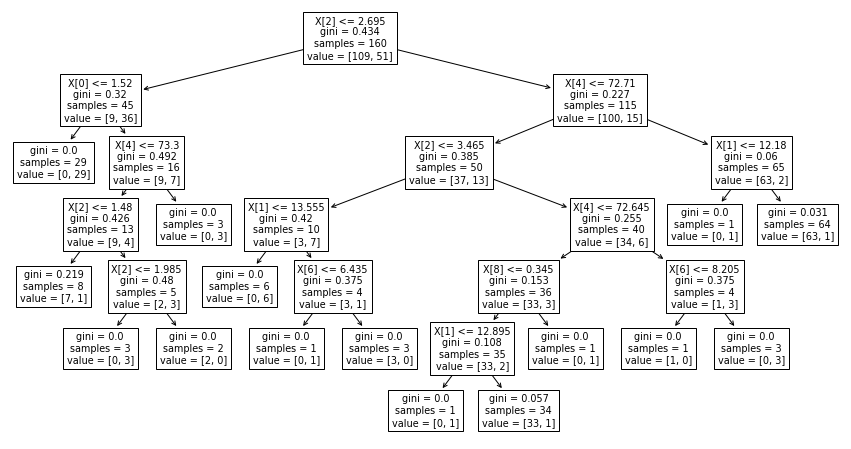

In [31]:
plt.figure(figsize = (15,8))
from sklearn import tree
tree.plot_tree(dtc5)
plt.show()

In [32]:
dtc.feature_importances_

array([0.09390178, 0.12717028, 0.54152193, 0.06871034, 0.12841502,
       0.01394136, 0.        , 0.        , 0.0263393 ])

In [33]:
dtc.n_features_

9

In [34]:
dtc.n_outputs_

1

In [35]:
dtc.n_classes_

2

# For Regression only change is of criterion other things are as it is

L1 Loss Function

L1 Loss Function is used to minimize the error which is the sum of the all the absolute differences between the true value and the predicted value.
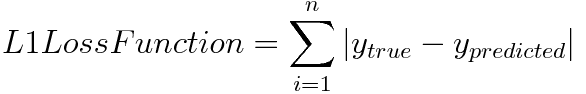

L2 Loss Function

L2 Loss Function is used to minimize the error which is the sum of the all the squared differences between the true value and the predicted value.

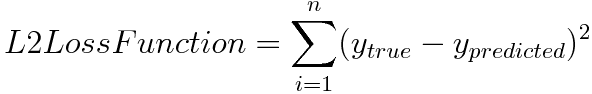

In [28]:
rfc4 = DecisionTreeClassifier(max_depth=2)
rfc4.fit(x_train,y_train)
y_pred = rfc4.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.8703703703703703
[[35  1]
 [ 6 12]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        36
           1       0.92      0.67      0.77        18

    accuracy                           0.87        54
   macro avg       0.89      0.82      0.84        54
weighted avg       0.88      0.87      0.86        54



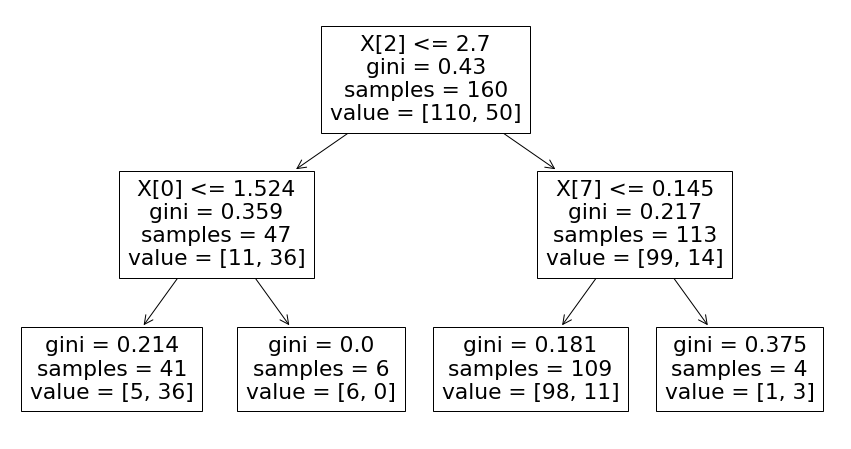

In [29]:

plt.figure(figsize = (15,8))
from sklearn import tree
tree.plot_tree(rfc4)
plt.show()